In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124 M
sd_hf = model_hf.state_dict()

In [3]:
for k, v in sd_hf.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [14]:
sd_hf["transformer.wte.weight"].view(-1)[:20]

tensor([-0.1101, -0.0393,  0.0331,  0.1338, -0.0485, -0.0789, -0.2398, -0.0895,
         0.0253, -0.1074, -0.1811, -0.0672,  0.0739, -0.0161,  0.0117,  0.1245,
        -0.0020, -0.0815,  0.0338,  0.2365])

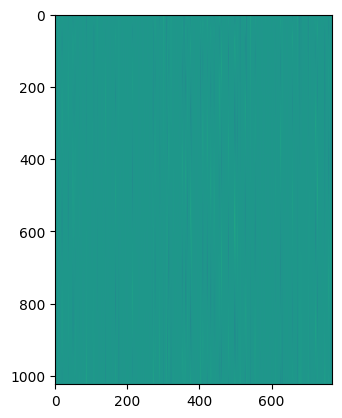

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
# [1024, 768]

plt.imshow(sd_hf["transformer.wpe.weight"])

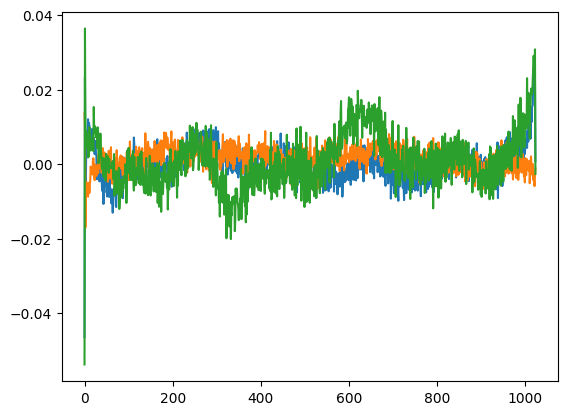

In [18]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 100])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])

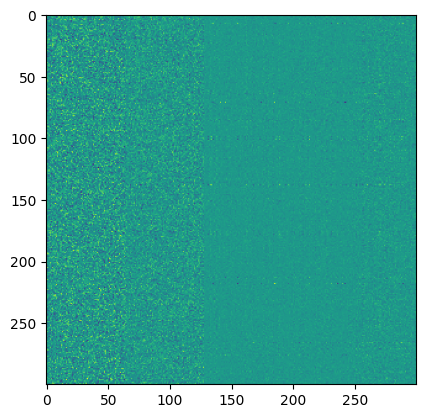

In [19]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300, :300])

In [29]:
from transformers import pipeline, set_seed

generator = pipeline('text-generation', model="gpt2", device = 0, pad_token_id=50256)
set_seed(43)

generator("Hello, i think you are a biology professor", max_length = 50, num_return_sequences = 5, truncation = True)

[{'generated_text': "Hello, i think you are a biology professor. Can you give me a quote from the bio from this blog? I am glad you wanted to read this essay. I am not sure what is the source of your ideas. I'm sure you can"},
 {'generated_text': "Hello, i think you are a biology professor? Hahaha, yeah, i love biology, so yeah, not that I should be surprised that i'm a biology professor. The idea of me teaching science courses to people for the first time comes"},
 {'generated_text': 'Hello, i think you are a biology professor at UC Davis. Well, i wonder, did someone take a note of my name?" he asked him. "That really helped. It\'s just a problem here. It\'s not so much \'oh'},
 {'generated_text': 'Hello, i think you are a biology professor and have been studying this ever since I first became an undergraduate. If i have not told you, and i need your approval for this chapter, i would like to say something to you. I think this'},
 {'generated_text': 'Hello, i think you are a biology p

In [23]:
import torch

In [24]:
torch.cuda.is_available()

True